In [1]:
!pip install rakun2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.4/725.4 KB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 92.8 MB/s eta 0:00:00
  Created wheel for rakun2: filename=rakun2-0.25-py3-none-any.whl size=933179 sha256=de57936ce92faa721ba4fc53de9d732f6939be294cd3220d454e90eaeb49e195
  Stored in directory: /root/.cache/pip/wheels/33/6e/94/01a2453fc88240862664d0b959e2e5c215797c606a7d4b610b
Successfully built rakun2
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [1]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 81.1 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=6ed25ef10c43af4e7cb50b017e7b201729a2ebe91c846e714c550a147e4113c2
  Stored in directory: /root/.cache/pip/wheels/68/aa/41/82025d89b0eb97484c9ac7d527abf596765c41733af79f86b0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=2cb7b0e1d8c18580edfb73fd0420e4d6315706fb03bf11

In [2]:
!pip install keyphrase_vectorizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.4 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.3
    Uninstalling transformers-4.27.3:
      Successfully uninstalled transformers-4.27.3


In [3]:
!pip install yake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 KB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp39-cp39-linux_x86_64.whl size=81479 sha256=74e9df6810a6d5a976419722856baa2fcbffbc7c6cdae68408f59c1244358912
  Stored in directory: /root/.cache/pip/wheels/a6/28/ba/284e37010e5d3aeed5e45345b58ab8683f97bdce46c9e147f9
Successfully built jellyfish


In [4]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup

In [5]:
from google.colab import files
from zipfile import ZipFile

# with ZipFile(files.upload(), 'r') as zip:
#   zip.extractall()
#   print('Done')
file_name = "/content/Life_of_Abraham_Lincoln.zip"

with ZipFile(file_name, 'r') as zipf:
  zipf.extractall()
  print('Done')

Done


In [6]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT

def get_keyword_bert(docs):
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=5,stop_words='english')
    return onewords

In [7]:
import yake
def get_keyword_yake(docs):
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, windowsSize=3,top = 5)
    keywords = kw_extractor.extract_keywords(docs)
    return keywords

In [8]:
from rakun2 import RakunKeyphraseDetector
def get_keyword_rakun(docs):
  hyperparameters = {"num_keywords": 5,
                   "merge_threshold": 1.1,
                   "alpha": 0.3,
                   "token_prune_len": 3}

  keyword_detector = RakunKeyphraseDetector(hyperparameters)
  out_keywords = keyword_detector.find_keywords(docs, input_type="string")
  return out_keywords

In [9]:
dir_path = "/content/Life_of_Abraham_Lincoln/part"
rootdir ="/content/Life_of_Abraham_Lincoln/"
part = 1
mp_lin_bert, mp_lin_yake, mp_lin_rakun = {}, {}, {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    print(no_of_chapters)
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter'+ str(i)                
                content = content_file.read()
                print(key)
                mp_lin_bert[key] = get_keyword_bert(content)
                mp_lin_yake[key] = get_keyword_yake(content)
                mp_lin_rakun[key] = get_keyword_rakun(content)
        x = target_x
        part += 1

30
1/chapter1


2023-03-25 03:45:37,069 - KeyphraseVectorizer - INFO - It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
INFO:KeyphraseVectorizer:It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


1/chapter2
1/chapter3
1/chapter4
1/chapter5
1/chapter6
1/chapter7
1/chapter8
1/chapter9
1/chapter10
1/chapter11
1/chapter12
1/chapter13
1/chapter14
1/chapter15
1/chapter16
1/chapter17
1/chapter18
1/chapter19
1/chapter20
1/chapter21
1/chapter22
1/chapter23
1/chapter24
1/chapter25
1/chapter26
1/chapter27
1/chapter28
1/chapter29
1/chapter30


In [10]:
with open("mp_lin_bert.json", "w") as outfile:
    json.dump(mp_lin_bert, outfile)

with open("mp_lin_yake.json", "w") as outfile:
    json.dump(mp_lin_yake, outfile)

with open("mp_lin_rakun.json", "w") as outfile:
    json.dump(mp_lin_rakun, outfile)

In [11]:
mp_combined = {}
for k in mp_lin_rakun.keys():
  k1 = set([v[0] for v in mp_lin_bert[k]])
  k2 = set([v[0] for v in mp_lin_yake[k]])
  k3 = set([v[0] for v in mp_lin_rakun[k]])
  mp_combined[k] = k1.union(k2,k3)

In [12]:
# mp_combined
for k,v in mp_combined.items():
  print(len(v))

15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
14
15
15
14
15
15
15
15


In [13]:
# book ="Life_of_Abraham_Lincoln"
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp_combined.items():
    for val in list_val:
        keyword_to_chap[val].append(key)


final_keywords = set()
all_keywords = list(mp_combined.values())
for i in all_keywords:
    for val in i:
            final_keywords.add(val)
print(final_keywords)   
print(len(final_keywords))

{'lady', 'black soldiers', 'General', 'qualities', 'general', 'revolt', 'Seward', 'unconstitutional', 'windows and roofs', 'political principles', 'democratic party', 'elect president', 'oﬀice department', 'newer and wilder', 'panics and alarms', 'defendant', 'state', 'leaders to listen', 'popular sovereignty', 'police regulations', 'ultimate extinction', 'northern hospitals', 'United States', 'brought', 'professional life', 'accompanied', 'dred scott qualiﬁcation', 'western boundary', 'father', 'withheld and controlled', 'generals', 'FREQUENT ALLUSIONS', 'side', 'rebels', 'embraced', 'national whig convention', 'nancy lincoln', 'God', 'military service', 'candidates', 'shelf a copy', 'republic', 'republican candidate', 'history', 'rebel government', 'conscriptions', 'power', 'presidency', 'slow and argumentative', 'compensated emancipation', 'candidate', 'kansas elections', 'confederate commissioners', 'meeting', 'lids as tenderly', 'practice', 'murder', 'incident occurred', 'fourth o

In [16]:
keyword_to_chap

defaultdict(list,
            {'descendants': ['1/chapter1'],
             'lincoln': ['1/chapter1',
              '1/chapter2',
              '1/chapter3',
              '1/chapter5',
              '1/chapter6',
              '1/chapter7',
              '1/chapter8',
              '1/chapter9',
              '1/chapter10',
              '1/chapter13',
              '1/chapter15',
              '1/chapter16',
              '1/chapter17',
              '1/chapter18',
              '1/chapter20',
              '1/chapter24',
              '1/chapter25',
              '1/chapter27',
              '1/chapter30'],
             'embraced': ['1/chapter1'],
             'father desire': ['1/chapter1'],
             'utensils and farming': ['1/chapter1'],
             'newer and wilder': ['1/chapter1'],
             'abraham lincoln': ['1/chapter1',
              '1/chapter2',
              '1/chapter3',
              '1/chapter5',
              '1/chapter6',
              '1/chapter12',
      

In [17]:
def get_year_to_content():
    dir_path = "/content/Life_of_Abraham_Lincoln/part"
    rootdir ="/content/Life_of_Abraham_Lincoln/"
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) < 1960 and int(date) > 1800:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"/chapter{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

year_to_chap = get_year_to_content()

keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
# print(key_yr_chap_mp)

In [18]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [39]:
key_yr_chap_mp

defaultdict(list,
            {'Descendants_1809': ['1/chapter1'],
             'Lincoln_1830': ['1/chapter3'],
             'Lincoln_1860': ['1/chapter13'],
             'Embraced_1809': ['1/chapter1'],
             'Father_Desire_1809': ['1/chapter1'],
             'Utensils_And_Farming_1809': ['1/chapter1'],
             'Newer_And_Wilder_1809': ['1/chapter1'],
             'Abraham_Lincoln_1809': ['1/chapter1'],
             'Abraham_Lincoln_1819': ['1/chapter2'],
             'Abraham_Lincoln_1830': ['1/chapter3'],
             'Abraham_Lincoln_1860': ['1/chapter15'],
             'Abraham_Lincoln_1864': ['1/chapter27'],
             'Education_1809': ['1/chapter1'],
             'Remove_1809': ['1/chapter1'],
             'Thomas_Lincoln_1809': ['1/chapter1'],
             'Thomas_Lincoln_1819': ['1/chapter2'],
             'Thomas_Lincoln_1830': ['1/chapter3'],
             'Abraham_1819': ['1/chapter2'],
             'Abraham_1830': ['1/chapter3'],
             'Nancy_Lincoln_1

In [19]:
def split_sentence_from_text(key):
    file_loc = r"/content/Life_of_Abraham_Lincoln/part%s.txt"%key
    text = ""
    with open(file_loc,encoding="utf8") as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Descendants_1809
Lincoln_1830
Lincoln_1860
Embraced_1809
Father_Desire_1809
Utensils_And_Farming_1809
Newer_And_Wilder_1809
Abraham_Lincoln_1809
Abraham_Lincoln_1819
Abraham_Lincoln_1830
Abraham_Lincoln_1860
Abraham_Lincoln_1864
Education_1809
Remove_1809
Thomas_Lincoln_1809
Thomas_Lincoln_1819
Thomas_Lincoln_1830
Abraham_1819
Abraham_1830
Nancy_Lincoln_1809
Incident_Occurred_1819
Brought_1819
Time_Abraham_1819
Neighbors_1819
Watched_And_Waited_1819
Life_1832
Boat_1819
Lincoln_Cabin_1819
Consisting_Of_Sections_1819
Attended_1819
Remembered_1830
Remembered_1864
Mrs._Lincoln_1830
Region_1830
First_Summer_1830
Speech_Young_Lincoln_1830
Quarter_Cents_1830
Business_1830
Sarah_Lincoln_1830
Half_A_Bushel_1830
Oﬀice_Department_1832
Guess_I_Surpassed_1832
Election_1832
Election_1852
Election_1860
Friends_1832
Rock_River_1832
Black_Hawk_1832
Black_Hawk_War_1832
Candidates_1832
General_Jackson_1832
General_1862
Captain_Lincoln_1832
Afterward_1832
History_1832
Writer_1832
Man_1832
Man_1837
Man_184

In [20]:
with open("mp_key_doc_lincoln.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [21]:
url = 'https://en.wikipedia.org/wiki/Abraham_Lincoln'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Family_and_childhood', 'Early_life', "Mother's_death", 'Education_and_move_to_Illinois', 'Marriage_and_children', 'Early_career_and_militia_service', 'Illinois_state_legislature_(1834–1842)', 'U.S._House_of_Representatives_(1847–1849)', 'Political_views', 'Prairie_lawyer', 'Republican_politics_(1854–1860)', 'Emergence_as_Republican_leader', '1856_campaign', 'Dred_Scott_v._Sandford', 'Lincoln–Douglas_debates_and_Cooper_Union_speech', '1860_presidential_election', 'Presidency_(1861–1865)', 'Secession_and_inauguration', 'Civil_War', 'Union_military_strategy', 'General_McClellan', 'Emancipation_Proclamation', 'Gettysburg_Address_(1863)', 'Promoting_General_Grant', 'Reelection', 'Reconstruction', 'Native_Americans', 'Whig_theory_of_a_presidency', 'Supreme_Court_appointments', 'Foreign_policy', 'Assassination', 'Funeral_and_burial', 'Religious_and_philosophical_beliefs', 'Health', 'Legacy', 'Republican_values', 'Reunification_of_the_states', 'Historical_reputation', 'Memory_and_memorials',

In [22]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' or val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            print(f"{key1} {key2} {cos_scores}")

Streaming output truncated to the last 5000 lines.
Funeral_and_burial Declared_1862 0.22862687706947327
Funeral_and_burial Army_Corps_1862 0.38644665479660034
Funeral_and_burial Capital_1862 0.3616713881492615
Funeral_and_burial Landing_1862 0.4239045977592468
Funeral_and_burial General_Mcclellan_1862 0.20779332518577576
Funeral_and_burial Mcclellan_Quarrels_1862 0.20779332518577576
Funeral_and_burial Mcclellan_1862 0.20779332518577576
Funeral_and_burial Army_1862 0.44365888833999634
Funeral_and_burial Enemy_Communications_1862 0.09996767342090607
Funeral_and_burial Generals_1862 0.3256390392780304
Funeral_and_burial Commanders_1862 0.40567833185195923
Funeral_and_burial Indispensable_Necessity_1862 0.2113073766231537
Funeral_and_burial Military_Emancipation_1862 0.3989526033401489
Funeral_and_burial Emancipation_Proclamation_1862 0.4050943851470947
Funeral_and_burial Emancipation_Proclamation_1863 0.32118600606918335
Funeral_and_burial Charged_With_Conniving_1862 0.27055251598358154
F

In [23]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open("mp_sim_score_lincoln.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

In [24]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

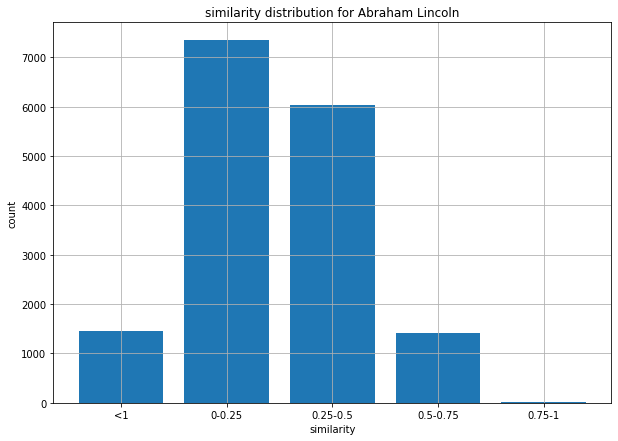

In [25]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<1"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e


display_bar_plot(mp_sim_score_bar_range,"similarity distribution for Abraham Lincoln","similarity","count")

In [26]:
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) < 1960 and int(date) > 1800:                    
                #print date
                year_list.append(date)
    except:
        pass
    if year_list:
        res = max(set(year_list), key=year_list.count)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
    

    
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.30:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = 170
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
#         print(f"{date_score}    {sim_score}")
        mixed_sim_score[key] = date_score*sim_score
    
maxval = max(mixed_sim_score.values())
for k,v in mixed_sim_score.items():
    mixed_sim_score[k] = v/maxval
    
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    #if v>= 0.35:
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))
    
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in section_wise_keyword_filtered.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")

Early_life  ->   ['Abe_Lincoln_1860', 'Abraham_Lincoln_1860', 'Abolition_1860', 'Lincoln_Men_1860', 'Republican_Party_1860']
Mother's_death  ->   ['Abraham_1819', 'Time_Abraham_1819', 'Abraham_Lincoln_1819', 'Thomas_Lincoln_1819', 'Lincoln_Cabin_1819']
Education_and_move_to_Illinois  ->   ['Abraham_Lincoln_1830', 'Thomas_Lincoln_1830', 'Mrs._Lincoln_1830', 'Abraham_1830', 'Lincoln_1830']
Marriage_and_children  ->   ['Slavery_Question_1852', 'Douglas_1852', 'Election_1852', 'State_1852', 'Political_Principles_1852']
Early_career_and_militia_service  ->   ['Captain_Lincoln_1832', 'Greene_1832', 'General_Jackson_1832', 'Candidates_1832', 'Sarah_Lincoln_1830']
Illinois_state_legislature_(1834–1842)  ->   ['Abe_Lincoln_1837', 'Read_Lawyer_1837', 'Defendant_1837', 'Slavery_Character_1834', 'Slavery_Sentiment_1834']
U.S._House_of_Representatives_(1847–1849)  ->   ['Whig_Members_1846', 'Whig_Party_1846', 'Whig_1846', 'Whig_Man_1846', 'National_Whig_Convention_1846']
Political_views  ->   ['Pre

In [30]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Inauguration', 'Funeral_Train', 'Judge_Douglas', 'General', 'Pride_And_Foolishness', 'White_House', 'Father_Desire', 'Powerful_And_Famous', 'States', 'Republican_Candidate', 'Confederate_Commissioners', 'Capital', 'Sovereignty', 'Thomas_Lincoln', 'Dred_Scott_Decision', 'Lincoln_Men', 'Confederates', 'Military_Emancipation', 'Abe_Lincoln', 'Rebellion', 'Confederate_Government', 'National_Whig_Convention', 'Slavery_Question', 'Eﬀiciency_In_Advocating', 'Abraham_Lincoln', 'Sarah_Lincoln', 'United_States', 'General_Scott', 'Republican_Party', 'Compromise_Measures', 'Prohibiting_Slavery', 'Earnestness', 'Whig_Party', 'President_Lincoln', 'Lincoln_Cabin', 'Slavery_Character', 'Elect_President', 'Whig_Man', 'Abraham', 'Senator_Douglas', 'Military_Necessity', 'State', 'General_Jackson', 'Election', 'Read_Lawyer', 'Time_Abraham', 'Qualities', 'Government', 'Medical_Authorities', 'Slavery_Sentiment', 'Rebels', 'Abolition', 'General_Sherman', 'Preliminary_Proclamation', 'Commanders', 'Douglas',

In [31]:
allLinks = soup.find(id="bodyContent").find_all("a")
linkToScrape = []
for link in allLinks:
    if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
        linkToScrape.append(link)

print(len(linkToScrape))
# print the urls of linkToScrape
# https://en.wikipedia.org/wiki/Nationalism#Anti-colonial_nationalism
# url = "https://en.wikipedia.org"
urls = set()
for link in linkToScrape:
    urls.add(link['href'].replace('/wiki/',""))
print(urls)

3212
{'Michigan_in_the_American_Civil_War', 'Robert_C._Smith_(political_scientist)', 'Leon_Litwack', 'Lincoln%E2%80%93Douglas_debates', 'Republican_National_Convention', 'Administration_(government)', '1873_Massachusetts_gubernatorial_election', 'The_American_Commonwealth', 'Commentaries_on_the_Laws_of_England', '1864_Louisiana_gubernatorial_election', '1874_Oregon_gubernatorial_election', 'Douglas_MacArthur', 'Lecompton_Constitution', 'United_States_v._Cruikshank', 'Kansas%E2%80%93Nebraska_Act', 'Victoria_Woodhull', 'Pennsylvania_Republican_Party', 'Category:Pages_using_Sister_project_links_with_hidden_wikidata', 'Thomas_Lincoln', 'Outline_of_Abraham_Lincoln', 'Republican_National_Coalition_for_Life', 'Civil_rights_movement', '2013_Republican_National_Committee_chairmanship_election', 'Koasati', 'The_Journal_of_Commerce', 'List_of_weapons_in_the_American_Civil_War', 'Morrill_Land-Grant_Colleges_Act', 'Howard_Baker', 'Special:BookSources/978-1-4331-0722-1', 'Jessie_Harlan_Lincoln', 'Ha

In [33]:
hyperlinks_present = final_keywords & urls
print(hyperlinks_present)
len(hyperlinks_present)

{'Thomas_Lincoln', 'White_House'}


2

In [35]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1)
#         final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Funeral_Train_1864', 'Army_Corps_1862', 'Sarah_Lincoln_1830', 'State_1852', 'States_1862', 'Military_Service_1863', 'South_Carolina_1861', 'Confederates_1861', 'Lincoln_1860', 'State_1861', 'Inauguration_1861', 'President_Lincoln_1861', 'Rebel_Government_1861', 'Pride_And_Foolishness_1864', 'Army_1862', 'Presidency_1860', 'President_1862', 'States_1863', 'Abe_Lincoln_1837', 'States_1861', 'Election_1852', 'Earnestness_1852', 'Exclude_Slavery_1858', 'Commanders_1862', 'Government_1862', 'Confederate_Government_1861', 'Senator_Douglas_1858', 'Mrs._Lincoln_1830', 'Douglas_1858', 'Republican_Party_1860', 'Generals_1862', 'Emancipation_Policy_1862', 'Confederate_Commissioners_1861', 'Republican_Candidate_1860', 'Term_Judge_Douglas_1858', 'Whig_Party_1846', 'Judge_Douglas_1858', 'Military_Emancipation_1862', 'Constitutionally_Elect_1860', 'Medical_Authorities_1862', 'Abolition_1860', 'Presidential_Election_1865', 'Abraham_Lincoln_1830', 'Sovereignty_1861', 'Eﬀiciency_In_Advocating_1858', '

In [36]:
keyword_to_chap_final = {}
for k,v in key_yr_chap_mp.items():
    if k in final_keywords:
        keyword_to_chap_final[k] = v
print(keyword_to_chap_final)

{'Lincoln_1830': ['1/chapter3'], 'Lincoln_1860': ['1/chapter13'], 'Father_Desire_1809': ['1/chapter1'], 'Abraham_Lincoln_1819': ['1/chapter2'], 'Abraham_Lincoln_1830': ['1/chapter3'], 'Abraham_Lincoln_1860': ['1/chapter15'], 'Abraham_Lincoln_1864': ['1/chapter27'], 'Thomas_Lincoln_1819': ['1/chapter2'], 'Thomas_Lincoln_1830': ['1/chapter3'], 'Abraham_1819': ['1/chapter2'], 'Abraham_1830': ['1/chapter3'], 'Time_Abraham_1819': ['1/chapter2'], 'Lincoln_Cabin_1819': ['1/chapter2'], 'Mrs._Lincoln_1830': ['1/chapter3'], 'Sarah_Lincoln_1830': ['1/chapter3'], 'Election_1852': ['1/chapter10'], 'Candidates_1832': ['1/chapter4'], 'General_Jackson_1832': ['1/chapter4'], 'General_1862': ['1/chapter24'], 'Captain_Lincoln_1832': ['1/chapter4'], 'Greene_1832': ['1/chapter5'], 'State_1852': ['1/chapter10'], 'State_1861': ['1/chapter19'], 'Slavery_Sentiment_1834': ['1/chapter6'], 'Slavery_Character_1834': ['1/chapter6'], 'Slavery_Question_1852': ['1/chapter10'], 'Slavery_Question_1863': ['1/chapter26'],

In [37]:
final_keyword_freq = list()
for s1 in final_keywords:
    temp = s1[:s1.rindex('_')]
    a = temp.split('_')
    for i,v in enumerate(a):
        a[i] = v.lower()
        
    final_keyword_freq.append(" ".join(a))
print(final_keyword_freq)

['funeral train', 'army corps', 'sarah lincoln', 'state', 'states', 'military service', 'south carolina', 'confederates', 'lincoln', 'state', 'inauguration', 'president lincoln', 'rebel government', 'pride and foolishness', 'army', 'presidency', 'president', 'states', 'abe lincoln', 'states', 'election', 'earnestness', 'exclude slavery', 'commanders', 'government', 'confederate government', 'senator douglas', 'mrs. lincoln', 'douglas', 'republican party', 'generals', 'emancipation policy', 'confederate commissioners', 'republican candidate', 'term judge douglas', 'whig party', 'judge douglas', 'military emancipation', 'constitutionally elect', 'medical authorities', 'abolition', 'presidential election', 'abraham lincoln', 'sovereignty', 'eﬀiciency in advocating', 'presidential election', 'political principles', 'lincoln', 'general smith', 'abraham lincoln', 'greene', 'military necessity', 'slavery question', 'abraham lincoln', 'presidential election', 'white house', 'republican party',

In [38]:
def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))

para = ""
for k,v in id_to_paragraph.items():
    para += v


final_keyword_freq_mp = {}
for k in final_keyword_freq:
    final_keyword_freq_mp[k] = find_freq(k,para)

total = len(final_keyword_freq)
cnt = 0
for k,v in final_keyword_freq_mp.items():
    if v>0:
        cnt += 1
        
print(cnt)
print(total)
print(cnt/total)

40
108
0.37037037037037035
